In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import pandas as pd 
import numpy as np 
import seaborn as sns
import random 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing

tfk = tf.keras
tfkl = tf.keras.layers

Num GPUs Available:  1


In [2]:
file='D:/Document/DSCI-601/NGAFID/NGAFID_MC_C28.csv'

df_test = pd.read_csv(file, nrows=100)
float_cols = [c for c in df_test if df_test[c].dtype == "float64"]
float32_cols = {c: np.float16 for c in float_cols}

df = pd.read_csv(file, dtype=float32_cols, engine='c')
df['id'] = df.id.astype('int32')
df = df.dropna()

In [3]:
len(df)

26750358

In [4]:
sources = df[['id', 'plane_id', 'split', 'date_diff', 'before_after']].drop_duplicates()
sources.loc[: , ['split', 'before_after', 'id']].groupby(['split', 'before_after']).count()

id
split before_after     
0     0             589
      1             484
1     0             555
      1             449
2     0             641
      1             552
3     0             343
      1             282
4     0             456
      1             382

In [5]:
df_visual= df.head(100000).drop(['id','plane_id','split','date_diff','before_after'],axis=1)

<AxesSubplot:>

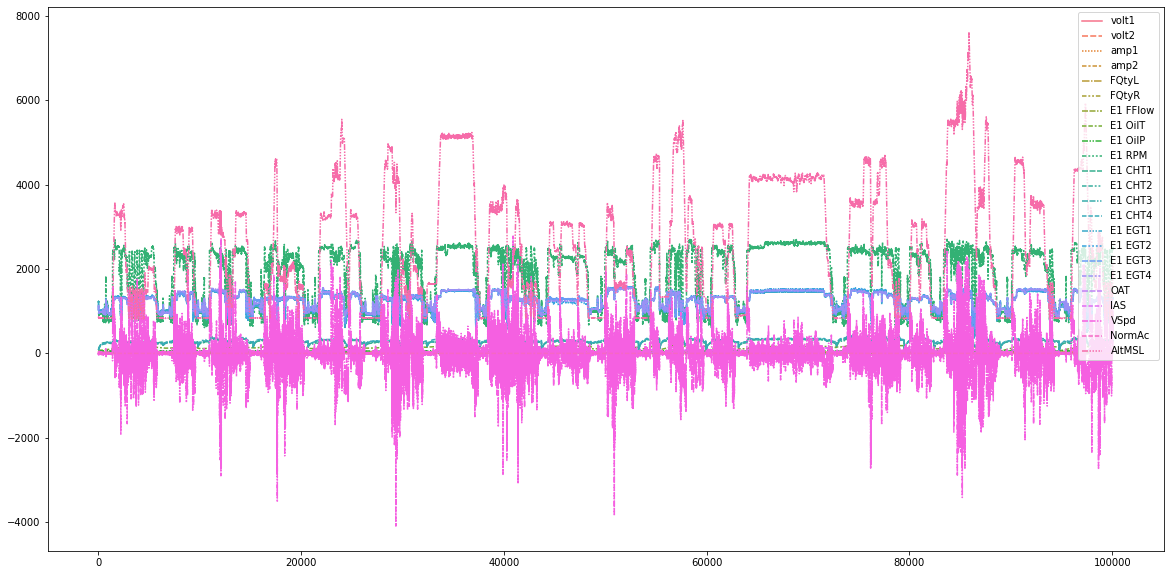

In [6]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_visual)

In [7]:
input_columns = ['volt1',
 'volt2',
 'amp1',
 'amp2',
 'FQtyL',
 'FQtyR',
 'E1 FFlow',
 'E1 OilT',
 'E1 OilP',
 'E1 RPM',
 'E1 CHT1',
 'E1 CHT2',
 'E1 CHT3',
 'E1 CHT4',
 'E1 EGT1',
 'E1 EGT2',
 'E1 EGT3',
 'E1 EGT4',
 'OAT',
 'IAS',
 'VSpd',
 'NormAc',
 'AltMSL']

array([[<AxesSubplot:title={'center':'volt1'}>,
        <AxesSubplot:title={'center':'volt2'}>,
        <AxesSubplot:title={'center':'amp1'}>,
        <AxesSubplot:title={'center':'amp2'}>,
        <AxesSubplot:title={'center':'FQtyL'}>],
       [<AxesSubplot:title={'center':'FQtyR'}>,
        <AxesSubplot:title={'center':'E1 FFlow'}>,
        <AxesSubplot:title={'center':'E1 OilT'}>,
        <AxesSubplot:title={'center':'E1 OilP'}>,
        <AxesSubplot:title={'center':'E1 RPM'}>],
       [<AxesSubplot:title={'center':'E1 CHT1'}>,
        <AxesSubplot:title={'center':'E1 CHT2'}>,
        <AxesSubplot:title={'center':'E1 CHT3'}>,
        <AxesSubplot:title={'center':'E1 CHT4'}>,
        <AxesSubplot:title={'center':'E1 EGT1'}>],
       [<AxesSubplot:title={'center':'E1 EGT2'}>,
        <AxesSubplot:title={'center':'E1 EGT3'}>,
        <AxesSubplot:title={'center':'E1 EGT4'}>,
        <AxesSubplot:title={'center':'OAT'}>,
        <AxesSubplot:title={'center':'IAS'}>],
       [<AxesSubpl

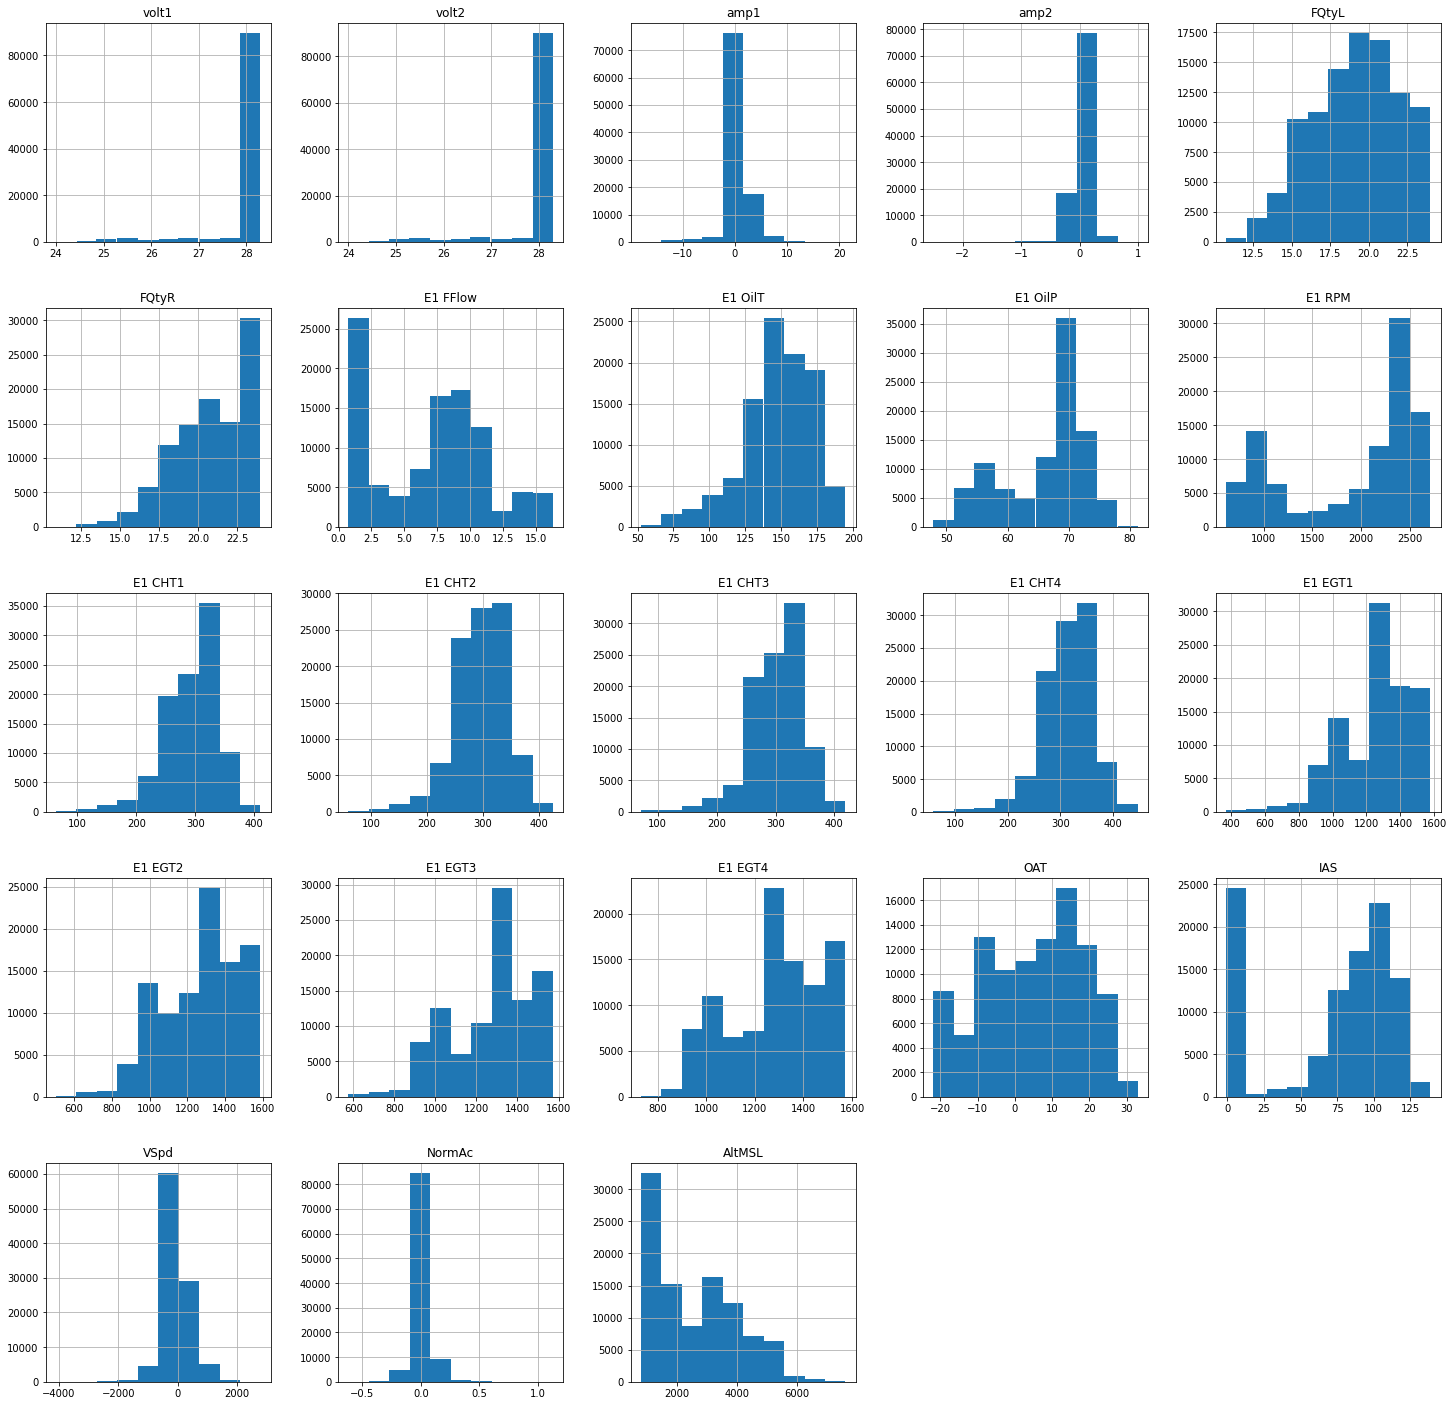

In [8]:
df_visual.hist(figsize = (25,25),column=input_columns)

In [9]:
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 100076
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   volt1     100000 non-null  float16
 1   volt2     100000 non-null  float16
 2   amp1      100000 non-null  float16
 3   amp2      100000 non-null  float16
 4   FQtyL     100000 non-null  float16
 5   FQtyR     100000 non-null  float16
 6   E1 FFlow  100000 non-null  float16
 7   E1 OilT   100000 non-null  float16
 8   E1 OilP   100000 non-null  float16
 9   E1 RPM    100000 non-null  float16
 10  E1 CHT1   100000 non-null  float16
 11  E1 CHT2   100000 non-null  float16
 12  E1 CHT3   100000 non-null  float16
 13  E1 CHT4   100000 non-null  float16
 14  E1 EGT1   100000 non-null  float16
 15  E1 EGT2   100000 non-null  float16
 16  E1 EGT3   100000 non-null  float16
 17  E1 EGT4   100000 non-null  float16
 18  OAT       100000 non-null  float16
 19  IAS       100000 non-null  float16
 20  VSpd

In [10]:
df_visual.head(10)

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,E1 CHT4,E1 EGT1,E1 EGT2,E1 EGT3,E1 EGT4,OAT,IAS,VSpd,NormAc,AltMSL
0,28.09375,28.09375,6.398438,0.399902,20.218750,23.84375,2.539062,74.2500,67.5000,1229.0,...,81.9375,1108.0,1006.0,1022.0,1035.0,-2.199219,0.0,13.210938,-0.029999,838.0
1,28.09375,28.09375,6.398438,0.399902,20.218750,23.84375,2.539062,74.2500,67.5000,1229.0,...,81.9375,1108.0,1006.0,1022.0,1035.0,-2.199219,0.0,13.210938,-0.029999,838.0
2,28.09375,28.09375,6.398438,0.500000,20.265625,23.84375,2.470703,74.2500,67.4375,1226.0,...,82.5000,1116.0,1011.0,1028.0,1044.0,-2.199219,0.0,11.148438,-0.029999,839.0
4,28.09375,28.09375,6.199219,0.399902,20.218750,23.84375,2.380859,74.2500,67.5000,1230.0,...,83.7500,1137.0,1022.5,1044.0,1060.0,-2.500000,0.0,-22.515625,-0.020004,841.0
5,28.09375,28.09375,6.300781,0.399902,20.156250,23.81250,2.300781,74.3125,67.5000,1227.0,...,84.3125,1147.0,1029.0,1053.0,1069.0,-2.500000,0.0,-13.546875,-0.010002,841.5
6,28.09375,28.09375,6.199219,0.399902,20.218750,23.81250,2.279297,74.3125,67.3750,1224.0,...,84.8750,1160.0,1037.0,1062.0,1081.0,-2.500000,0.0,1.690430,-0.010002,842.0
7,28.09375,28.09375,6.199219,0.399902,20.156250,23.81250,2.119141,74.3125,67.2500,1218.0,...,85.6250,1174.0,1045.0,1071.0,1095.0,-2.800781,0.0,10.656250,0.010002,861.0
8,28.09375,28.09375,6.101562,0.399902,20.156250,23.78125,2.160156,74.3125,67.1875,1214.0,...,86.2500,1190.0,1055.0,1083.0,1113.0,-2.800781,0.0,0.830078,-0.010002,863.0
9,28.09375,28.09375,6.101562,0.399902,20.218750,23.78125,2.179688,74.3125,67.0625,1206.0,...,86.8125,1204.0,1066.0,1095.0,1130.0,-2.800781,0.0,-8.281250,-0.010002,862.0
10,28.09375,28.09375,6.000000,0.399902,20.218750,23.78125,2.220703,74.3125,67.0625,1207.0,...,87.5625,1218.0,1076.0,1106.0,1144.0,-3.000000,0.0,12.976562,0.010002,862.0


In [11]:
df_visual.describe()

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,E1 CHT4,E1 EGT1,E1 EGT2,E1 EGT3,E1 EGT4,OAT,IAS,VSpd,NormAc,AltMSL
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.0000,100000.0,...,100000.00000,100000.00,100000.00,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000
mean,NaN,NaN,NaN,-0.005852,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005856,NaN
std,0.000000,0.000000,0.000000,0.119568,0.000000,0.000000,0.000000,0.00000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.075134,NaN
min,24.000000,24.000000,-18.000000,-2.500000,10.742188,10.867188,0.750000,52.40625,47.8750,611.0,...,58.15625,367.75,503.25,576.0,729.5,-21.796875,-1.070312,-4094.000000,-0.620117,803.500
25%,28.000000,28.000000,0.300049,0.000000,17.093750,19.062500,2.140625,134.75000,60.9375,1140.0,...,286.25000,1108.00,1110.00,1108.0,1134.0,-6.000000,29.183594,-132.750000,-0.020004,984.875
50%,28.093750,28.093750,0.700195,0.000000,19.296875,21.015625,7.820312,149.12500,68.4375,2270.0,...,319.25000,1292.00,1307.00,1306.0,1301.0,6.199219,88.750000,-0.429932,0.000000,2372.000
75%,28.093750,28.203125,1.400391,0.000000,21.218750,23.078125,9.773438,165.37500,70.6875,2458.0,...,349.75000,1432.00,1455.00,1437.0,1452.0,16.203125,104.375000,104.265625,0.029999,3616.000
max,28.296875,28.296875,21.203125,1.000000,24.000000,24.000000,16.328125,194.50000,81.2500,2712.0,...,447.50000,1578.00,1589.00,1573.0,1573.0,33.000000,138.750000,2782.000000,1.129883,7620.000


In [12]:
BATCH_SIZE = 32
SHAPE = (4096, 23)
BLOCK_SHAPE = (128, 23)
EPOCHS = 30
VARIABLES = 23
NFOLD = 5 
STEPS_PER_EPOCH = 200

In [13]:
preprocess = preprocessing.MinMaxScaler()
preprocess.fit(df.loc[:, input_columns].sample(100000, random_state = 0 ))
org_value = df.loc[:, input_columns].values
res = preprocess.transform(org_value)
for i, col in enumerate(input_columns):
    df.loc[:, col] = res[:, i]

C:\Users\47008\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [14]:
def get_dataset(df): 

    ids = df.id.unique()

    sensor_datas = []
    afters = [] 

    for id in ids: 
        sensor_data = df[df.id == id].iloc[-SHAPE[0]:, :23].values

        sensor_data = np.pad(sensor_data, [[0, SHAPE[0]- len(sensor_data)], [0,0]])

        sensor_data = tf.convert_to_tensor(sensor_data, dtype = tf.float32) 

        after = df[df.id == id]['before_after'].iloc[0]

        sensor_datas.append(sensor_data)
        afters.append(after)


    sensor_datas = tf.stack(sensor_datas)
    afters = np.stack(afters)

    ds = tf.data.Dataset.from_tensor_slices( (sensor_datas, afters))
    
    return ds

In [15]:
def slice_random(x, y):
    start = tf.random.uniform(shape=[], minval=0, maxval=4096-BLOCK_SHAPE[0], dtype=tf.int64)
    x = x[start: start + BLOCK_SHAPE[0]]
    x = tf.reshape(x, (BLOCK_SHAPE))
    return x, y 

In [16]:
def fix_type(x, y):

    return tf.cast(x, tf.float32), tf.cast(y, tf.float32)

In [17]:
def prepare_for_training(ds, shuffle = False, repeat = False, predict= True):
    
    ds = ds.map(fix_type)
    ds = ds.map(slice_random)

    ds = ds.shuffle(512) if shuffle else ds 
    ds = ds.repeat() if repeat else ds 
    ds = ds.batch(BATCH_SIZE, drop_remainder=True)

    if not predict: 
        ds = ds.map(lambda x, y : (x, x) ) 
    else: 
        ds = ds.map(lambda x, y : (x, tf.reshape(y, (-1, 1))) )
         
    return ds

In [18]:
def get_train_and_val_for_fold(folded_datasets, fold):
    predict = True

    train = []
    for i in range(NFOLD-1): 
        if i == fold:
            val_ds = folded_datasets[i][0].concatenate(folded_datasets[i][1])
        else: 
            train.append(folded_datasets[i][0])
    
    test_ds = folded_datasets[4][0].concatenate(folded_datasets[4][1])
    
    train_ds = None
    for ds in train: 
        train_ds = ds if train_ds is None else train_ds.concatenate(ds)

    test_ds = prepare_for_training(test_ds, shuffle=False)
    train_ds = prepare_for_training(train_ds, shuffle=True, repeat = True)
    val_ds = prepare_for_training(val_ds, shuffle=False)
    
    return train_ds, val_ds, test_ds

In [19]:
folded_datasets = []

for i in range(NFOLD):
    after = get_dataset(df[(df.split == i) & (df.before_after == 1)])
    before = get_dataset(df[(df.split == i) & (df.before_after == 0)])
    folded_datasets.append((after, before))

In [20]:
def conv_model_long(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tf.keras.layers.GlobalAveragePooling1D(),
                                            tfkl.Dense(1, activation='sigmoid'),
    ])
    return model                      

In [21]:
def conv_model_short(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tf.keras.layers.GlobalAveragePooling1D(),
                                            tfkl.Dense(1, activation='sigmoid'),
    ])
    return model

In [22]:
cnn_long_result = {}
for i in range(NFOLD-1):   
    model_long= conv_model_long()
    model_long.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                       metrics = ['accuracy', 
                                  tf.keras.metrics.AUC(curve='ROC', name = 'ROC'),
                                  tf.keras.metrics.AUC(curve='PR', name = 'PR'), 
                                 tf.keras.metrics.RootMeanSquaredError(),],
                       loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                      )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)
    res_long_cnn = model_long.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_long_result[i] = res_long_cnn.history
    
pd.DataFrame(cnn_long_result)

Epoch 1/30
200/200 [==============================] - 9s 19ms/step - loss: 0.2416 - accuracy: 0.8034 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4915 - val_loss: 0.2531 - val_accuracy: 0.4583 - val_ROC: 0.4760 - val_PR: 0.4432 - val_root_mean_squared_error: 0.5031
Epoch 2/30
200/200 [==============================] - 3s 17ms/step - loss: 0.1957 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4424 - val_loss: 0.2711 - val_accuracy: 0.4583 - val_ROC: 0.4900 - val_PR: 0.4490 - val_root_mean_squared_error: 0.5207
Epoch 3/30
200/200 [==============================] - 3s 17ms/step - loss: 0.1113 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.3337 - val_loss: 0.3346 - val_accuracy: 0.4583 - val_ROC: 0.4936 - val_PR: 0.4458 - val_root_mean_squared_error: 0.5785
Epoch 4/30
200/200 [==============================] - 3s 17ms/step - loss: 0.0406 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error

200/200 [==============================] - 4s 20ms/step - loss: 1.9784e-04 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0141 - val_loss: 0.5392 - val_accuracy: 0.4583 - val_ROC: 0.4989 - val_PR: 0.4578 - val_root_mean_squared_error: 0.7343
Epoch 1/30
200/200 [==============================] - 5s 21ms/step - loss: 0.2115 - accuracy: 0.9998 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4599 - val_loss: 0.2637 - val_accuracy: 0.4526 - val_ROC: 0.5037 - val_PR: 0.4521 - val_root_mean_squared_error: 0.5135
Epoch 2/30
200/200 [==============================] - 4s 19ms/step - loss: 0.1300 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.3606 - val_loss: 0.3251 - val_accuracy: 0.4526 - val_ROC: 0.4842 - val_PR: 0.4351 - val_root_mean_squared_error: 0.5702
Epoch 3/30
200/200 [==============================] - 4s 20ms/step - loss: 0.0454 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.213

Epoch 29/30
200/200 [==============================] - 4s 20ms/step - loss: 6.3392e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0080 - val_loss: 0.5459 - val_accuracy: 0.4526 - val_ROC: 0.4973 - val_PR: 0.4512 - val_root_mean_squared_error: 0.7389
Epoch 30/30
200/200 [==============================] - 4s 21ms/step - loss: 4.6600e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0068 - val_loss: 0.5461 - val_accuracy: 0.4526 - val_ROC: 0.4953 - val_PR: 0.4502 - val_root_mean_squared_error: 0.7390
Epoch 1/30
200/200 [==============================] - 6s 23ms/step - loss: 0.2351 - accuracy: 0.8733 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4849 - val_loss: 0.2542 - val_accuracy: 0.4662 - val_ROC: 0.5150 - val_PR: 0.4808 - val_root_mean_squared_error: 0.5041
Epoch 2/30
200/200 [==============================] - 4s 21ms/step - loss: 0.1661 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squ

Epoch 28/30
200/200 [==============================] - 4s 18ms/step - loss: 1.2596e-04 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0112 - val_loss: 0.5316 - val_accuracy: 0.4662 - val_ROC: 0.4989 - val_PR: 0.4656 - val_root_mean_squared_error: 0.7291
Epoch 29/30
200/200 [==============================] - 4s 18ms/step - loss: 9.6735e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0098 - val_loss: 0.5322 - val_accuracy: 0.4662 - val_ROC: 0.4958 - val_PR: 0.4641 - val_root_mean_squared_error: 0.7295
Epoch 30/30
200/200 [==============================] - 4s 18ms/step - loss: 6.6302e-05 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0081 - val_loss: 0.5321 - val_accuracy: 0.4662 - val_ROC: 0.5033 - val_PR: 0.4679 - val_root_mean_squared_error: 0.7294
Epoch 1/30
200/200 [==============================] - 5s 18ms/step - loss: 0.2353 - accuracy: 0.9244 - ROC: 0.0000e+00 - PR: 1.0000 - root_mea

Epoch 27/30
200/200 [==============================] - 3s 16ms/step - loss: 3.2675e-04 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0181 - val_loss: 0.5343 - val_accuracy: 0.4638 - val_ROC: 0.4893 - val_PR: 0.4584 - val_root_mean_squared_error: 0.7309
Epoch 28/30
200/200 [==============================] - 3s 16ms/step - loss: 2.0615e-04 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0144 - val_loss: 0.5339 - val_accuracy: 0.4638 - val_ROC: 0.4956 - val_PR: 0.4616 - val_root_mean_squared_error: 0.7307
Epoch 29/30
200/200 [==============================] - 3s 16ms/step - loss: 1.4840e-04 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0122 - val_loss: 0.5342 - val_accuracy: 0.4638 - val_ROC: 0.4920 - val_PR: 0.4598 - val_root_mean_squared_error: 0.7309
Epoch 30/30
200/200 [==============================] - 3s 16ms/step - loss: 1.1490e-04 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - roo

,0,1,2,3
loss,"[0.24160675704479218, 0.19573211669921875, 0.1...","[0.21150945127010345, 0.1300036460161209, 0.04...","[0.2351461946964264, 0.16606014966964722, 0.06...","[0.23531776666641235, 0.1825876384973526, 0.09..."
accuracy,"[0.8034374713897705, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9998437762260437, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.8732812404632568, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9243749976158142, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
ROC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
PR,"[1.0, 1.0, 1.0, 1.0, 0.9999999403953552, 1.0, ...","[0.9999999403953552, 1.0, 1.0, 1.0, 0.99999994...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9999999403953552, 1.0, 0.9999999403953552, ..."
root_mean_squared_error,"[0.49153509736061096, 0.4424162209033966, 0.33...","[0.4599015712738037, 0.36056017875671387, 0.21...","[0.4849187433719635, 0.40750476717948914, 0.25...","[0.4850956201553345, 0.427302747964859, 0.3060..."
val_loss,"[0.25307735800743103, 0.2710767090320587, 0.33...","[0.2636812925338745, 0.32513582706451416, 0.42...","[0.25416451692581177, 0.29087886214256287, 0.3...","[0.2544200122356415, 0.2774893343448639, 0.353..."
val_accuracy,"[0.4583333432674408, 0.4583333432674408, 0.458...","[0.4526209533214569, 0.4526209533214569, 0.452...","[0.46621620655059814, 0.46621620655059814, 0.4...","[0.4638157784938812, 0.4638157784938812, 0.463..."
val_ROC,"[0.4760446548461914, 0.4900468587875366, 0.493...","[0.5036791563034058, 0.48421910405158997, 0.48...","[0.5150015354156494, 0.5042781829833984, 0.489...","[0.48428183794021606, 0.5005982518196106, 0.47..."
val_PR,"[0.443244993686676, 0.4490177631378174, 0.4458...","[0.45214253664016724, 0.4351269006729126, 0.44...","[0.4807771146297455, 0.45497021079063416, 0.45...","[0.45185425877571106, 0.46950453519821167, 0.4..."
val_root_mean_squared_error,"[0.5030679106712341, 0.5206502676010132, 0.578...","[0.5134990811347961, 0.5702068209648132, 0.653...","[0.5041472911834717, 0.53933185338974, 0.62218...","[0.5044006109237671, 0.5267725586891174, 0.594..."


In [28]:
cnn_short_result = {}
for i in range(NFOLD-1):   
    model_short= conv_model_short()
    model_short.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                    metrics = ['accuracy', 
                               tf.keras.metrics.AUC(curve='ROC', name = 'ROC'),
                               tf.keras.metrics.AUC(curve='PR', name = 'PR'),
                               tf.keras.metrics.RootMeanSquaredError(),],
                    loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                    )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)
    res_short_cnn = model_short.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_short_result[i] = res_short_cnn.history
    
pd.DataFrame(cnn_short_result)

Epoch 1/30
200/200 [==============================] - 4s 12ms/step - loss: 0.2328 - accuracy: 0.9794 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4825 - val_loss: 0.2537 - val_accuracy: 0.4583 - val_ROC: 0.5101 - val_PR: 0.4507 - val_root_mean_squared_error: 0.5036
Epoch 2/30
200/200 [==============================] - 2s 11ms/step - loss: 0.2042 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4519 - val_loss: 0.2598 - val_accuracy: 0.4583 - val_ROC: 0.4855 - val_PR: 0.4363 - val_root_mean_squared_error: 0.5097
Epoch 3/30
200/200 [==============================] - 2s 11ms/step - loss: 0.1751 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4185 - val_loss: 0.2682 - val_accuracy: 0.4583 - val_ROC: 0.4904 - val_PR: 0.4415 - val_root_mean_squared_error: 0.5179
Epoch 4/30
200/200 [==============================] - 2s 12ms/step - loss: 0.1429 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error

200/200 [==============================] - 2s 12ms/step - loss: 0.0088 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0937 - val_loss: 0.5244 - val_accuracy: 0.4583 - val_ROC: 0.4884 - val_PR: 0.4497 - val_root_mean_squared_error: 0.7241
Epoch 1/30
200/200 [==============================] - 3s 13ms/step - loss: 0.2901 - accuracy: 0.0369 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.5386 - val_loss: 0.2483 - val_accuracy: 0.5423 - val_ROC: 0.5128 - val_PR: 0.4529 - val_root_mean_squared_error: 0.4983
Epoch 2/30
200/200 [==============================] - 2s 11ms/step - loss: 0.2609 - accuracy: 0.1562 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.5107 - val_loss: 0.2505 - val_accuracy: 0.4677 - val_ROC: 0.4825 - val_PR: 0.4394 - val_root_mean_squared_error: 0.5005
Epoch 3/30
200/200 [==============================] - 2s 11ms/step - loss: 0.2328 - accuracy: 0.9827 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4825 - 

200/200 [==============================] - 2s 11ms/step - loss: 0.0082 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0905 - val_loss: 0.5289 - val_accuracy: 0.4526 - val_ROC: 0.4905 - val_PR: 0.4418 - val_root_mean_squared_error: 0.7273
Epoch 30/30
200/200 [==============================] - 2s 11ms/step - loss: 0.0090 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0949 - val_loss: 0.5296 - val_accuracy: 0.4526 - val_ROC: 0.4948 - val_PR: 0.4463 - val_root_mean_squared_error: 0.7278
Epoch 1/30
200/200 [==============================] - 4s 13ms/step - loss: 0.1938 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4402 - val_loss: 0.2619 - val_accuracy: 0.4662 - val_ROC: 0.4960 - val_PR: 0.4674 - val_root_mean_squared_error: 0.5118
Epoch 2/30
200/200 [==============================] - 2s 12ms/step - loss: 0.1624 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4029 -

200/200 [==============================] - 2s 12ms/step - loss: 0.0089 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0945 - val_loss: 0.5112 - val_accuracy: 0.4662 - val_ROC: 0.5147 - val_PR: 0.4730 - val_root_mean_squared_error: 0.7150
Epoch 29/30
200/200 [==============================] - 2s 11ms/step - loss: 0.0086 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0929 - val_loss: 0.5150 - val_accuracy: 0.4662 - val_ROC: 0.4850 - val_PR: 0.4529 - val_root_mean_squared_error: 0.7176
Epoch 30/30
200/200 [==============================] - 2s 12ms/step - loss: 0.0087 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0931 - val_loss: 0.5148 - val_accuracy: 0.4662 - val_ROC: 0.5183 - val_PR: 0.4790 - val_root_mean_squared_error: 0.7175
Epoch 1/30
200/200 [==============================] - 3s 11ms/step - loss: 0.2479 - accuracy: 0.6141 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4979 

200/200 [==============================] - 2s 10ms/step - loss: 0.0094 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0968 - val_loss: 0.5147 - val_accuracy: 0.4638 - val_ROC: 0.5122 - val_PR: 0.4742 - val_root_mean_squared_error: 0.7174
Epoch 28/30
200/200 [==============================] - 2s 10ms/step - loss: 0.0089 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0944 - val_loss: 0.5114 - val_accuracy: 0.4638 - val_ROC: 0.4854 - val_PR: 0.4514 - val_root_mean_squared_error: 0.7151
Epoch 29/30
200/200 [==============================] - 2s 10ms/step - loss: 0.0086 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0930 - val_loss: 0.5268 - val_accuracy: 0.4638 - val_ROC: 0.4726 - val_PR: 0.4592 - val_root_mean_squared_error: 0.7258
Epoch 30/30
200/200 [==============================] - 2s 10ms/step - loss: 0.0085 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0923

,0,1,2,3
loss,"[0.23284225165843964, 0.2042238861322403, 0.17...","[0.2900702953338623, 0.2608633041381836, 0.232...","[0.19379737973213196, 0.1623571813106537, 0.13...","[0.2478945404291153, 0.22335487604141235, 0.19..."
accuracy,"[0.9793750047683716, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.03687499836087227, 0.15625, 0.9826562404632...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.614062488079071, 0.999218761920929, 1.0, 1...."
ROC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
PR,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 0.9999999403953552, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999403953552, ...","[1.0, 1.0, 1.0, 1.0, 0.9999999403953552, 1.0, ..."
root_mean_squared_error,"[0.48253729939460754, 0.4519113600254059, 0.41...","[0.5385817289352417, 0.5107477903366089, 0.482...","[0.44022423028945923, 0.4029356837272644, 0.37...","[0.49789008498191833, 0.472604364156723, 0.444..."
val_loss,"[0.253658652305603, 0.25977084040641785, 0.268...","[0.24828222393989563, 0.2504865229129791, 0.25...","[0.2619357705116272, 0.27082738280296326, 0.28...","[0.25172314047813416, 0.25516191124916077, 0.2..."
val_accuracy,"[0.4583333432674408, 0.4583333432674408, 0.458...","[0.5423387289047241, 0.4677419364452362, 0.452...","[0.46621620655059814, 0.46621620655059814, 0.4...","[0.46546053886413574, 0.4638157784938812, 0.46..."
val_ROC,"[0.5100849270820618, 0.4855462312698364, 0.490...","[0.5127764940261841, 0.48247385025024414, 0.48...","[0.49596545100212097, 0.5192424058914185, 0.51...","[0.4617706537246704, 0.49692705273628235, 0.49..."
val_PR,"[0.45065468549728394, 0.43634045124053955, 0.4...","[0.45291420817375183, 0.4394378364086151, 0.44...","[0.4674012064933777, 0.47537901997566223, 0.48...","[0.4377824664115906, 0.46490907669067383, 0.46..."
val_root_mean_squared_error,"[0.5036453604698181, 0.5096771717071533, 0.517...","[0.49827924370765686, 0.5004862546920776, 0.50...","[0.5117965936660767, 0.5204107761383057, 0.530...","[0.5017201900482178, 0.5051355361938477, 0.510..."


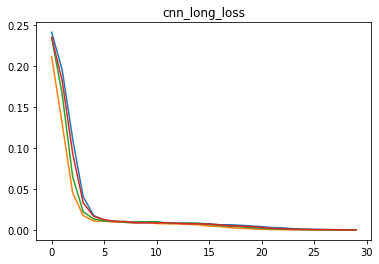

In [24]:
plt.title('cnn_long_loss')
for i in range(4):
    plt.plot(cnn_long_result[i]['loss'])

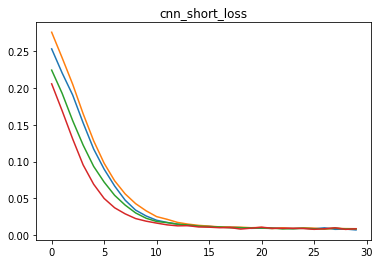

In [25]:
plt.title('cnn_short_loss')
for i in range(4):
    plt.plot(cnn_short_result[i]['loss'])

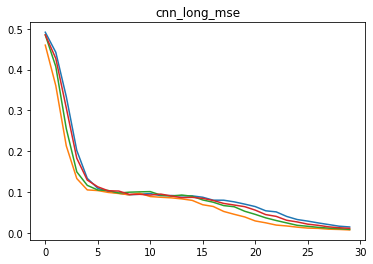

In [26]:
plt.title("cnn_long_mse")
for i in range(4):
    plt.plot(cnn_long_result[i]['root_mean_squared_error'])

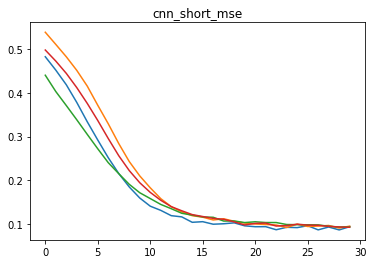

In [29]:
plt.title("cnn_short_mse")
for i in range(4):
    plt.plot(cnn_short_result[i]['root_mean_squared_error'])

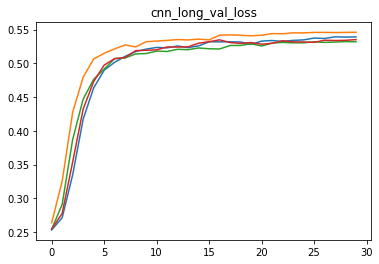

In [30]:
plt.title('cnn_long_val_loss')
for i in range(4):
    plt.plot(cnn_long_result[i]['val_loss'])

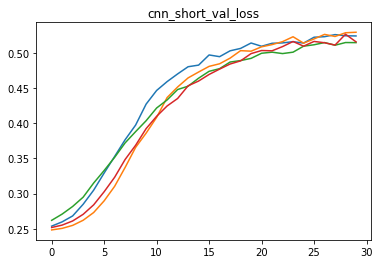

In [31]:
plt.title('cnn_short_val_loss')
for i in range(4):
    plt.plot(cnn_short_result[i]['val_loss'])

26/26 [==============================] - 1s 3ms/step


<AxesSubplot:title={'center':'long_prediction'}>

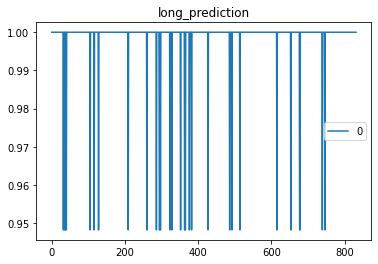

In [32]:
cnn_predict_long = model_long.predict(test_dataset, verbose = True)
plt.title("long_prediction")
sns.lineplot(data=cnn_predict_long)

26/26 [==============================] - 0s 2ms/step


<AxesSubplot:title={'center':'short_prediction'}>

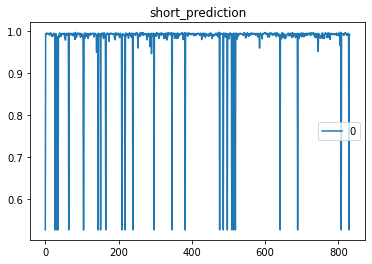

In [33]:
cnn_predict_short = model_short.predict(test_dataset, verbose = True)
plt.title("short_prediction")
sns.lineplot(data=cnn_predict_short)

array([[<AxesSubplot:title={'center':'cnn_predict_short_result'}>]],
      dtype=object)

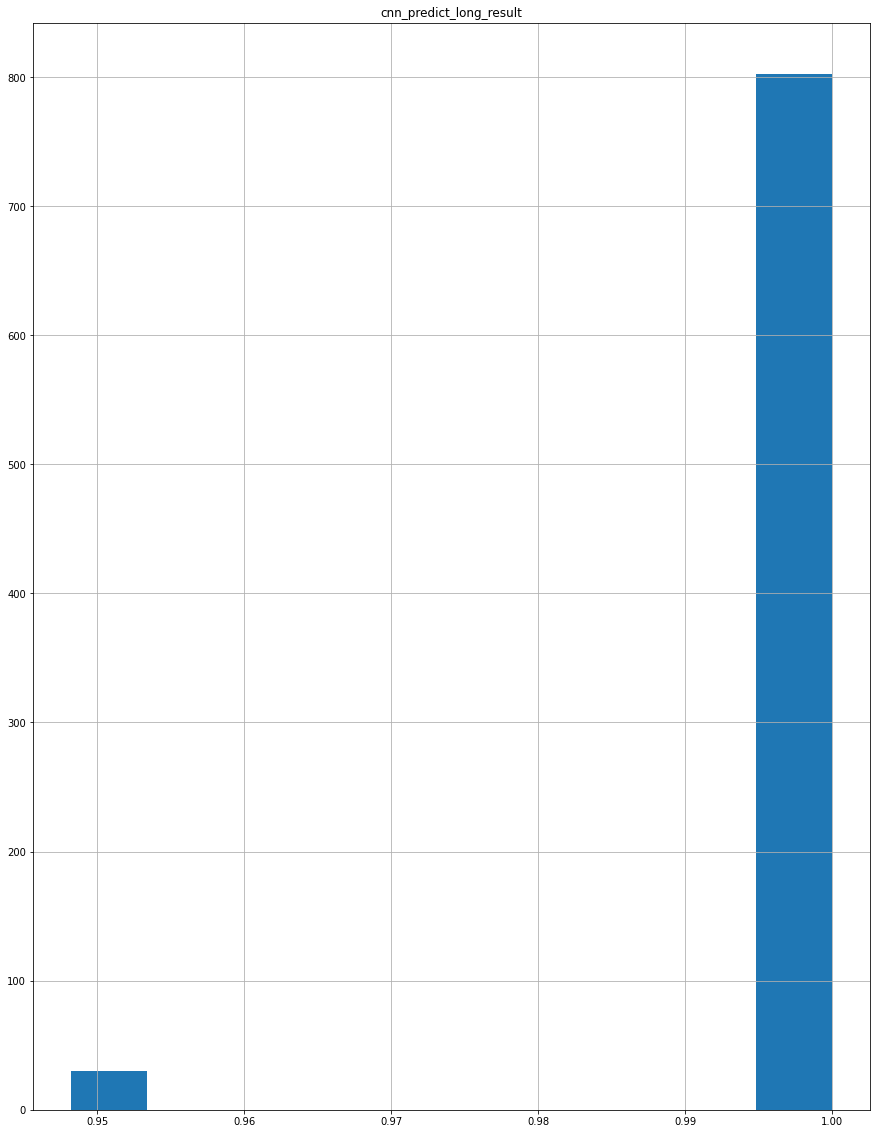

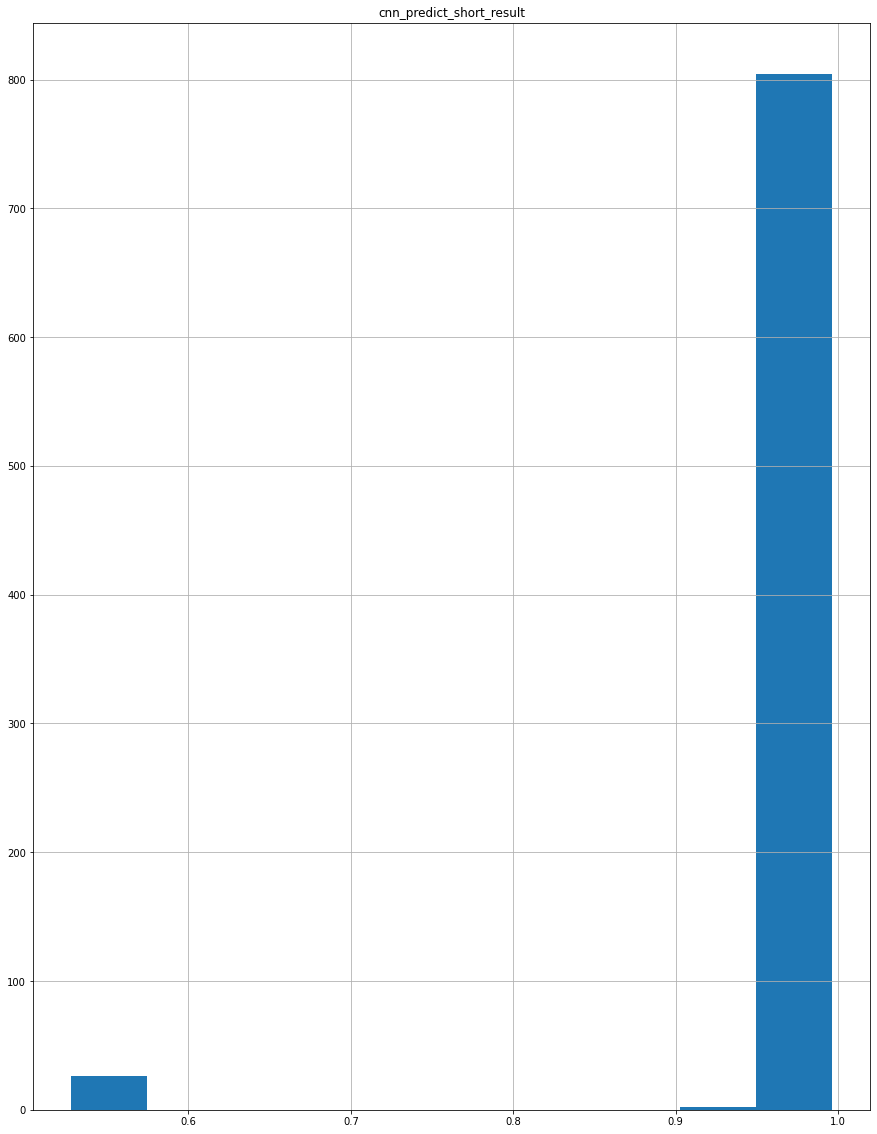

In [38]:
cnn_predict_long_result = pd.DataFrame(cnn_predict_long)
cnn_predict_long_result.columns = ['cnn_predict_long_result']
cnn_predict_long_result.hist(figsize = (15,20),column= 'cnn_predict_long_result')

cnn_predict_short_result = pd.DataFrame(cnn_predict_short)
cnn_predict_short_result.columns = ['cnn_predict_short_result']
cnn_predict_short_result.hist(figsize = (15,20),column= 'cnn_predict_short_result')